In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_friedman1
from sklearn.model_selection import train_test_split, learning_curve, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation
from keras.optimizers import SGD, RMSprop, Adam

In [2]:
tf.config.optimizer.set_jit(True) # Enable XLA.

In [3]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF


## Random dataset generated

In [4]:
n_samples = 150000
n_features = 10
X, y = make_friedman1(n_samples=n_samples, n_features=n_features, noise=1.0)
X

array([[0.29637386, 0.66823779, 0.71987765, ..., 0.01033863, 0.25615306,
        0.80430341],
       [0.60721635, 0.77710283, 0.99161867, ..., 0.46945112, 0.74824027,
        0.58431283],
       [0.69344824, 0.41140882, 0.2552478 , ..., 0.4933878 , 0.27754066,
        0.43343604],
       ...,
       [0.00933068, 0.99267491, 0.62902278, ..., 0.63515957, 0.01402587,
        0.67670339],
       [0.8917144 , 0.70937289, 0.20978931, ..., 0.15482696, 0.37788727,
        0.36948501],
       [0.65166931, 0.8803329 , 0.11807962, ..., 0.30108255, 0.54972044,
        0.7522732 ]])

## Split dataset into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

array([[0.10398227, 0.27825545, 0.45075019, ..., 0.91963722, 0.91690133,
        0.16492466],
       [0.48264145, 0.63730758, 0.72392647, ..., 0.55869722, 0.93024763,
        0.78258811],
       [0.52671737, 0.0741653 , 0.52478077, ..., 0.31158985, 0.02814792,
        0.08333308],
       ...,
       [0.79259666, 0.91832735, 0.71164215, ..., 0.46805819, 0.4641788 ,
        0.66797662],
       [0.36562048, 0.7175734 , 0.8126485 , ..., 0.46812815, 0.82215069,
        0.34740435],
       [0.38500978, 0.26728401, 0.69196054, ..., 0.38661701, 0.24611552,
        0.27518879]])

In [6]:
train_df = pd.DataFrame(X_train)
train_y_df = pd.DataFrame(y_train, columns=['y'])
train_df = pd.concat([train_df.reset_index(drop=True), train_y_df.reset_index(drop=True)], axis=1)
train_df

,0,1,2,3,4,5,6,7,8,9,y
0,0.103982,0.278255,0.450750,0.918114,0.308864,0.818606,0.833746,0.919637,0.916901,0.164925,12.113192
1,0.482641,0.637308,0.723926,0.959802,0.235778,0.238373,0.833656,0.558697,0.930248,0.782588,20.215154
2,0.526717,0.074165,0.524781,0.010971,0.707430,0.080801,0.945350,0.311590,0.028148,0.083333,4.367434
3,0.769146,0.070292,0.862388,0.550254,0.640145,0.503854,0.264797,0.212839,0.434041,0.393601,13.717048
4,0.143837,0.309822,0.796080,0.150316,0.009347,0.918074,0.125639,0.357272,0.025191,0.246966,2.874793
...,...,...,...,...,...,...,...,...,...,...,...
119995,0.241674,0.915279,0.871921,0.736941,0.756686,0.786467,0.403785,0.235327,0.943377,0.129153,21.259156
119996,0.469521,0.428711,0.703483,0.302404,0.660672,0.512170,0.889359,0.481629,0.146690,0.835062,13.163564
119997,0.792597,0.918327,0.711642,0.127178,0.411285,0.330632,0.837746,0.468058,0.464179,0.667977,10.610437
119998,0.365620,0.717573,0.812648,0.061766,0.065767,0.988339,0.632530,0.468128,0.822151,0.347404,8.997080


<Axes: >

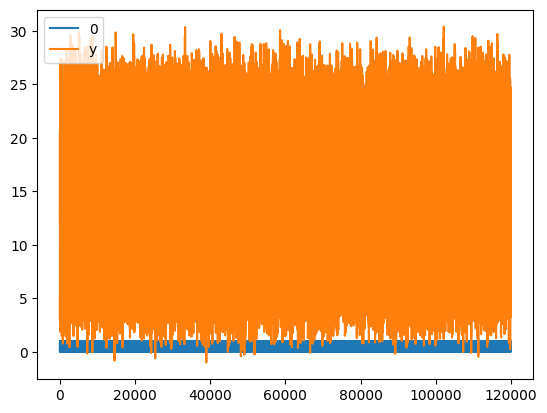

In [7]:
train_df[[0, 'y']].plot()

The data is clearly non-linear

## Lineral Regression

In [8]:
lr_model = LinearRegression()
history = lr_model.fit(X_train, y_train)
print(lr_model.score(X_test, y_test))

0.7251892783429588


In [9]:
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

6.819071993896168

<Axes: >

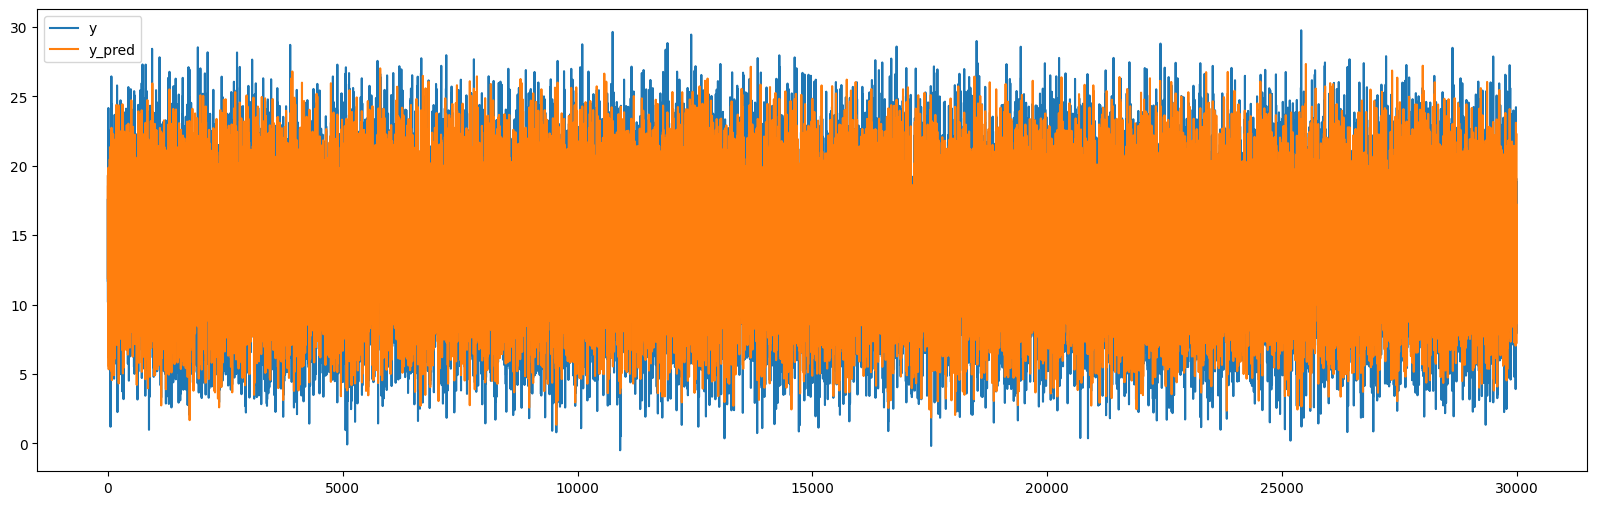

In [10]:
test_pred_df = pd.DataFrame(y_pred, columns=['y_pred'])
test_y_df = pd.DataFrame(y_test, columns=['y'])
test_df = pd.concat([test_pred_df.reset_index(drop=True), test_y_df.reset_index(drop=True)], axis=1)
test_df[['y', 'y_pred']].plot(figsize=(20, 6))

In [11]:
print(f'y = a * x + b = {lr_model.coef_} * x + {lr_model.intercept_}')

y = a * x + b = [ 6.70489877e+00  6.74369290e+00  6.38172574e-02  9.99204295e+00
  5.02399734e+00  2.78393540e-02 -6.50520524e-03 -2.45342763e-02
 -5.48296407e-03  3.84192144e-02] * x + 0.1283651275674611


In [12]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes_abs, train_scores, test_scores = learning_curve(lr_model, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error')


In [13]:
print('train_sizes_abs', train_sizes_abs)
print('train_scores', train_scores)
print('test_scores', test_scores)

train_sizes_abs [ 12000  39000  66000  93000 120000]
train_scores [[-6.71742803 -6.78284902 -6.80755425 -6.6528124  -6.80592698]
 [-6.86938311 -6.83646523 -6.91533246 -6.81691217 -6.82966538]
 [-6.83388069 -6.77898368 -6.84159914 -6.80666889 -6.79915892]
 [-6.84610433 -6.81469281 -6.86089345 -6.83978    -6.8143829 ]
 [-6.87539908 -6.850484   -6.88809671 -6.85641692 -6.84871807]]
test_scores [[-6.82687231 -6.92911968 -6.7746242  -6.90025458 -6.93973211]
 [-6.82326125 -6.92191448 -6.7701482  -6.89455513 -6.92670369]
 [-6.82066794 -6.9196932  -6.76854491 -6.89428561 -6.9260084 ]
 [-6.81955816 -6.9191582  -6.76828303 -6.89511539 -6.9252692 ]
 [-6.81907199 -6.91873986 -6.76812664 -6.89516809 -6.92551508]]


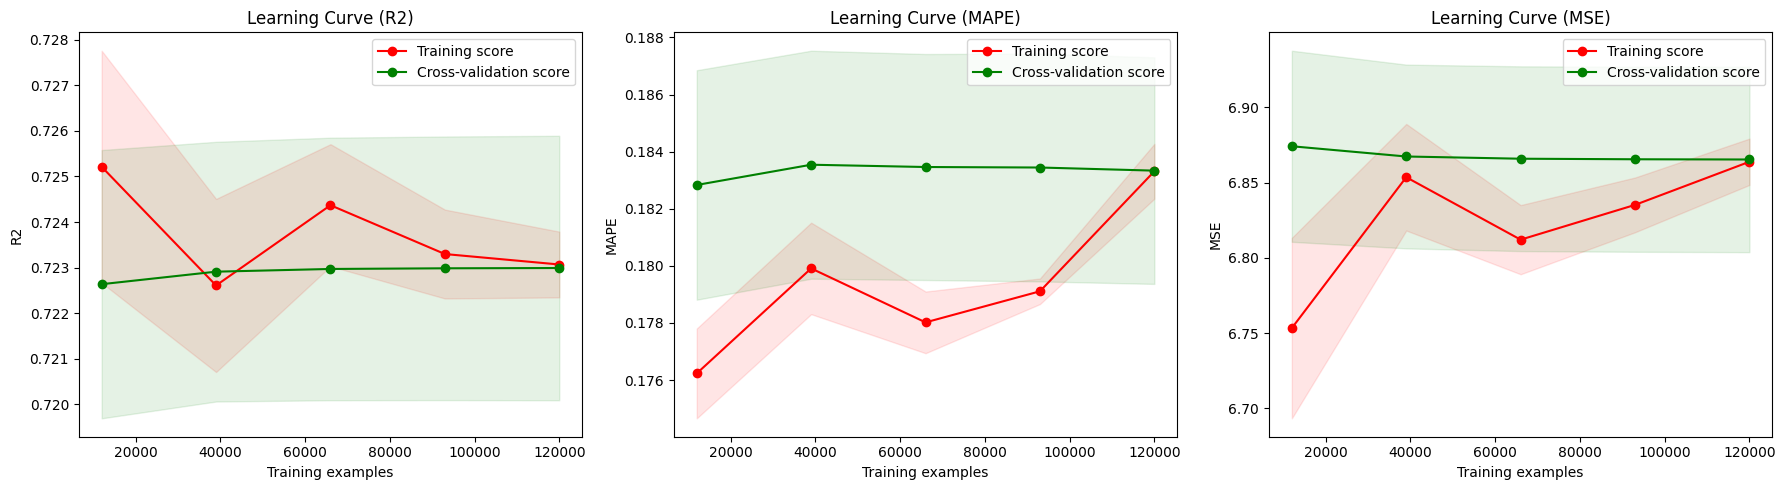

In [14]:
# Initialize plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
metrics = ['r2', 'mape', 'mse']
scorings = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']

# Loop through each metric
for idx, (metric, scoring) in enumerate(zip(metrics, scorings)):
    # Get train and test scores
    train_sizes, train_scores, test_scores = learning_curve(lr_model, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes, scoring=scoring)

    # Calculate means and standard deviations for train and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Adjust scoring for display (if necessary)
    if scoring.startswith('neg_'):
        train_scores_mean = -train_scores_mean
        test_scores_mean = -test_scores_mean

    # Plot learning curves
    axs[idx].fill_between(train_sizes, train_scores_mean - train_scores_std,
                          train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axs[idx].fill_between(train_sizes, test_scores_mean - test_scores_std,
                          test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axs[idx].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axs[idx].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    # Set plot titles and labels
    axs[idx].set_title(f'Learning Curve ({metric.upper()})')
    axs[idx].set_xlabel('Training examples')
    axs[idx].set_ylabel(metric.upper())
    axs[idx].legend(loc="best")

# Show plot
plt.tight_layout()
plt.show()


### Results interpretation

## Neural Networks

In [33]:
layers_options = [5]
optimizers_options = {'SGD': SGD(clipvalue=0.5), 'RMSProp': RMSprop, 'Adam': Adam}
learning_rates = [0.1, 0.01, 0.001]
loss_function = 'mean_squared_error'

# layers_options = [1, 5, 25]
# optimizers_options = {'SGD': SGD, 'RMSProp': RMSprop, 'Adam': Adam}
# learning_rates = [0.1]
# loss_function = 'mean_squared_error'

In [16]:
def custom_r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [29]:
def define_model(
    layers_num: int,
    Optimizer,
    learning_rate: float,
    loss_function: str = 'mean_squared_error',
    regularization_factor: float = 0.01
):
  model = Sequential()
  model.add(Dense(
      units=64,
      # activation='relu',
      input_shape=(X_train.shape[1],),
      kernel_regularizer=l2(regularization_factor),
      activity_regularizer=l2(regularization_factor)
  )) # input layer
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  for _ in range(layers - 1):
    model.add(
        Dense(
            units=64,
            # activation='relu',
            kernel_regularizer=l2(regularization_factor),
            activity_regularizer=l2(regularization_factor)),
        )
    model.add(BatchNormalization())
    model.add(Activation('relu'))

  model.add(Dense(units=1))

  model.compile(
      optimizer=Optimizer(learning_rate=lr),
      loss=loss_function,
      metrics=[custom_r2_score, 'mape', 'mse']
  )

  return model

In [18]:
def plot_learning_curves(history, title):
    plt.figure(figsize=(10, 6))

    plt.plot(history.history['loss'], label='MSE (training loss)')
    plt.plot(history.history['mape'], label='MAPE')
    plt.plot(history.history['custom_r2_score'], label='R^2')

    plt.plot(history.history['val_loss'], label='MSE (val loss)')
    plt.plot(history.history['val_mape'], label='MAPE (val)')
    plt.plot(history.history['val_custom_r2_score'], label='R^2 (val)')

    plt.title(title)
    plt.ylabel('Loss / MAPE')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

In [19]:
# model = Sequential()
# model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
# model.add(Dense(units=64, activation='relu'))
# model.add(Dense(units=1))
# model.compile(
#     optimizer=SGD(learning_rate=0.1),
#     loss='mean_squared_error',
# )

# history = model.fit(
#     X_train,
#     y_train,
#     epochs=2,
#     batch_size=32,
#     validation_data=(X_test, y_test)
# )

# print(history.history.keys())

# plt.figure(figsize=(10, 6))
# print(history.history['loss'])
# plt.plot(history.history['loss'], label='MSE (training loss)')
# plt.ylabel('Loss / MAPE')
# plt.xlabel('Epoch')
# plt.legend()
# plt.show()


****************************************************************************************************
Layers: 5, Optimizer: SGD, LR: 0.1
Epoch 1/50
1875/1875 [==============================] - 12s 5ms/step - loss: 9.7353 - custom_r2_score: 0.7795 - mape: 15.7247 - mse: 5.2890 - val_loss: 4.0143 - val_custom_r2_score: 0.8624 - val_mape: 11.7848 - val_mse: 3.3002
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 4.4289 - custom_r2_score: 0.8408 - mape: 14.3138 - mse: 3.8091 - val_loss: 3.7059 - val_custom_r2_score: 0.8707 - val_mape: 12.5771 - val_mse: 3.0932
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 4.5056 - custom_r2_score: 0.8365 - mape: 14.1949 - mse: 3.8945 - val_loss: 5.3830 - val_custom_r2_score: 0.8037 - val_mape: 18.9502 - val_mse: 4.7573
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 4.5051 - custom_r2_score: 0.8357 - mape: 14.3432 - mse: 3.9118 - val_loss: 5.7485 - val_custom_r2_score: 0.7

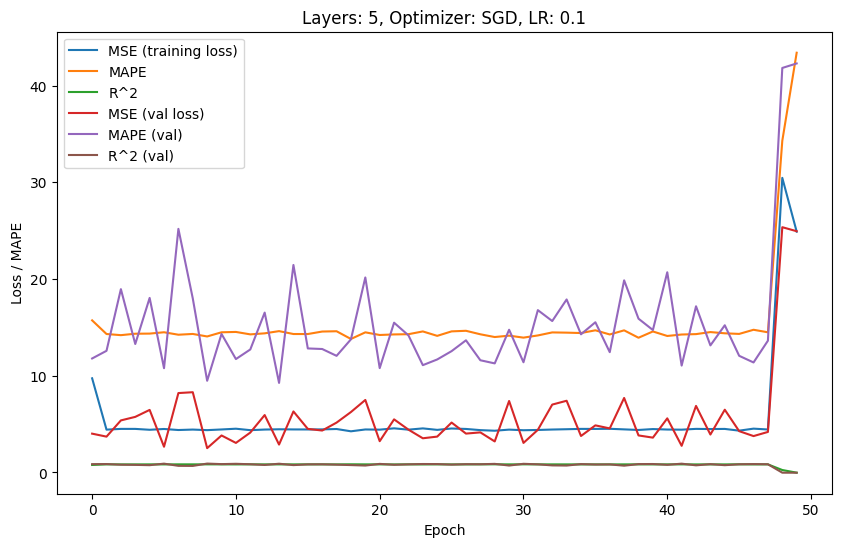

****************************************************************************************************
Layers: 5, Optimizer: SGD, LR: 0.01
Epoch 1/50
1875/1875 [==============================] - 13s 6ms/step - loss: 6.3985 - custom_r2_score: 0.8518 - mape: 13.0066 - mse: 3.5197 - val_loss: 4.2177 - val_custom_r2_score: 0.9007 - val_mape: 11.1185 - val_mse: 2.3948
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 3.8917 - custom_r2_score: 0.8931 - mape: 11.4690 - mse: 2.5414 - val_loss: 2.8307 - val_custom_r2_score: 0.9228 - val_mape: 9.7718 - val_mse: 1.8527
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 3.1360 - custom_r2_score: 0.9014 - mape: 11.1377 - mse: 2.3458 - val_loss: 2.5356 - val_custom_r2_score: 0.9214 - val_mape: 9.2866 - val_mse: 1.8709
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 2.8223 - custom_r2_score: 0.9040 - mape: 10.9324 - mse: 2.2752 - val_loss: 2.2940 - val_custom_r2_score: 0.9

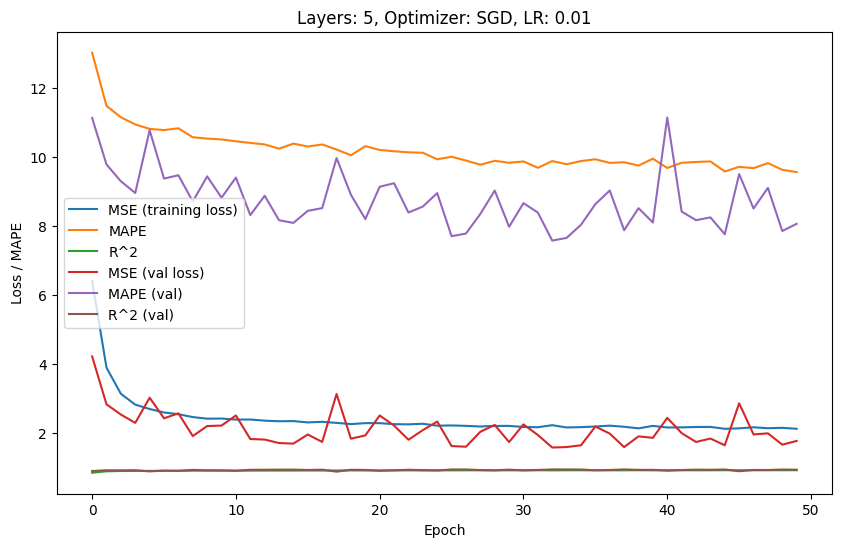

****************************************************************************************************
Layers: 5, Optimizer: SGD, LR: 0.001
Epoch 1/50
1875/1875 [==============================] - 12s 5ms/step - loss: 9.8285 - custom_r2_score: 0.7531 - mape: 15.0567 - mse: 5.9408 - val_loss: 5.4096 - val_custom_r2_score: 0.9253 - val_mape: 9.6011 - val_mse: 1.7836
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 5.9519 - custom_r2_score: 0.8916 - mape: 11.7652 - mse: 2.5730 - val_loss: 4.6228 - val_custom_r2_score: 0.9388 - val_mape: 8.5988 - val_mse: 1.4614
Epoch 3/50
1875/1875 [==============================] - 10s 6ms/step - loss: 5.3358 - custom_r2_score: 0.8998 - mape: 11.1017 - mse: 2.3754 - val_loss: 4.2053 - val_custom_r2_score: 0.9409 - val_mape: 8.2795 - val_mse: 1.4109
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 4.8871 - custom_r2_score: 0.9049 - mape: 10.9030 - mse: 2.2627 - val_loss: 3.9336 - val_custom_r2_score: 0.

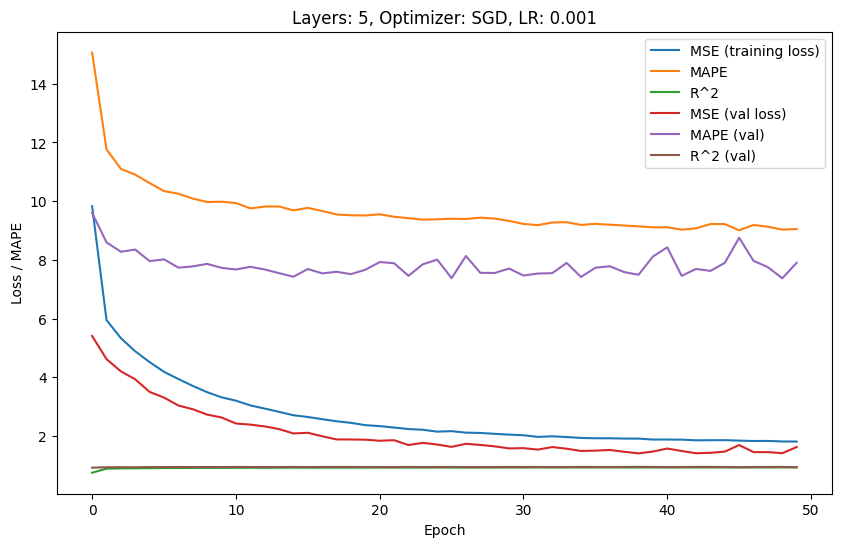

****************************************************************************************************
Layers: 5, Optimizer: RMSProp, LR: 0.1
Epoch 1/50
1875/1875 [==============================] - 15s 6ms/step - loss: 7.9576 - custom_r2_score: 0.7516 - mape: 16.7504 - mse: 5.9203 - val_loss: 13.6004 - val_custom_r2_score: 0.4801 - val_mape: 24.3898 - val_mse: 12.3116
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 5.9904 - custom_r2_score: 0.8006 - mape: 15.8993 - mse: 4.7574 - val_loss: 18.3393 - val_custom_r2_score: 0.2982 - val_mape: 30.4033 - val_mse: 17.0780
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 6.2844 - custom_r2_score: 0.7904 - mape: 16.0748 - mse: 5.0557 - val_loss: 24.8063 - val_custom_r2_score: 0.0077 - val_mape: 44.0691 - val_mse: 23.7057
Epoch 4/50
1875/1875 [==============================] - 10s 6ms/step - loss: 5.9005 - custom_r2_score: 0.8046 - mape: 15.7011 - mse: 4.6691 - val_loss: 20.4369 - val_custom_

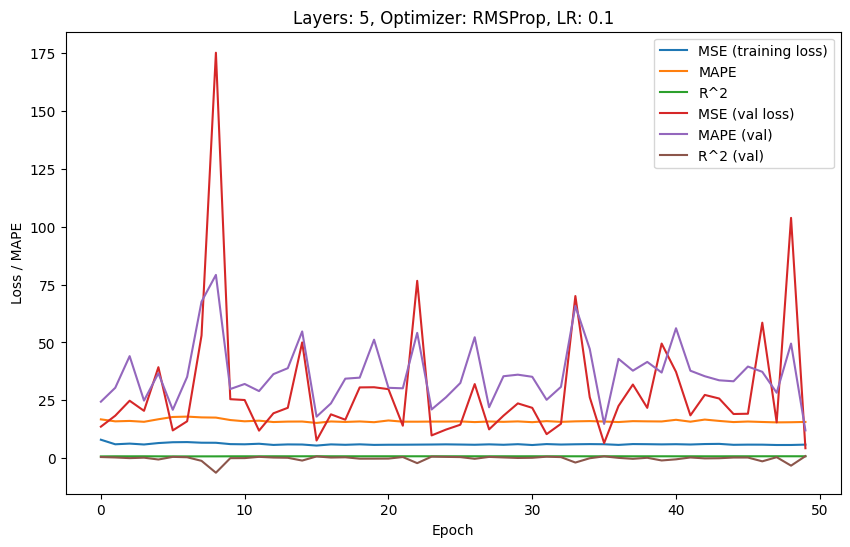

****************************************************************************************************
Layers: 5, Optimizer: RMSProp, LR: 0.01
Epoch 1/50
1875/1875 [==============================] - 14s 6ms/step - loss: 5.5247 - custom_r2_score: 0.8191 - mape: 13.9578 - mse: 4.3592 - val_loss: 2.8788 - val_custom_r2_score: 0.8942 - val_mape: 11.0530 - val_mse: 2.5252
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 2.8610 - custom_r2_score: 0.8913 - mape: 11.6487 - mse: 2.5809 - val_loss: 2.4504 - val_custom_r2_score: 0.9079 - val_mape: 10.0698 - val_mse: 2.2000
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 2.6785 - custom_r2_score: 0.8966 - mape: 11.4612 - mse: 2.4519 - val_loss: 3.6307 - val_custom_r2_score: 0.8577 - val_mape: 11.5913 - val_mse: 3.4141
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 2.5920 - custom_r2_score: 0.8993 - mape: 11.4082 - mse: 2.3848 - val_loss: 6.6529 - val_custom_r2_sco

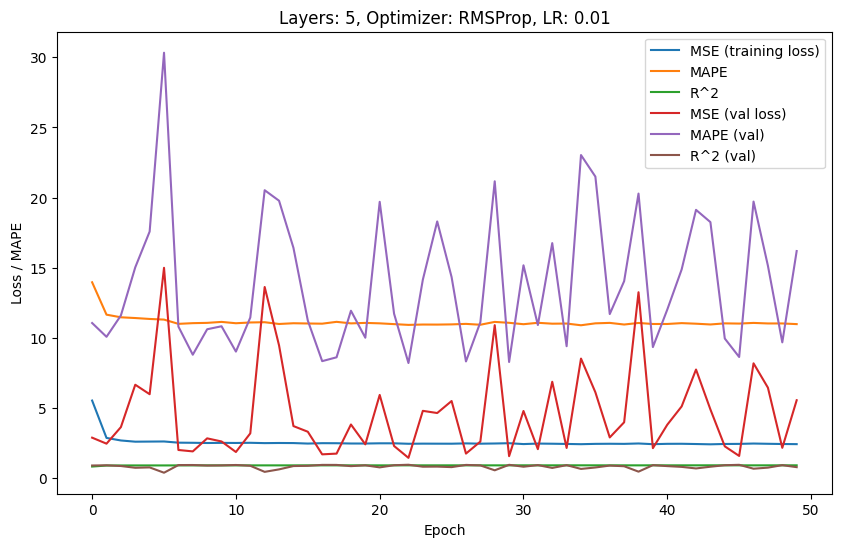

****************************************************************************************************
Layers: 5, Optimizer: RMSProp, LR: 0.001
Epoch 1/50
1875/1875 [==============================] - 14s 6ms/step - loss: 19.7900 - custom_r2_score: 0.2742 - mape: 20.3608 - mse: 17.0071 - val_loss: 3.3519 - val_custom_r2_score: 0.9349 - val_mape: 8.5901 - val_mse: 1.5513
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 3.7961 - custom_r2_score: 0.8988 - mape: 11.2122 - mse: 2.4002 - val_loss: 2.7173 - val_custom_r2_score: 0.9303 - val_mape: 9.0290 - val_mse: 1.6725
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 3.1099 - custom_r2_score: 0.9056 - mape: 10.7648 - mse: 2.2433 - val_loss: 1.9579 - val_custom_r2_score: 0.9474 - val_mape: 7.8715 - val_mse: 1.2565
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 2.7363 - custom_r2_score: 0.9095 - mape: 10.5462 - mse: 2.1438 - val_loss: 1.9126 - val_custom_r2_sco

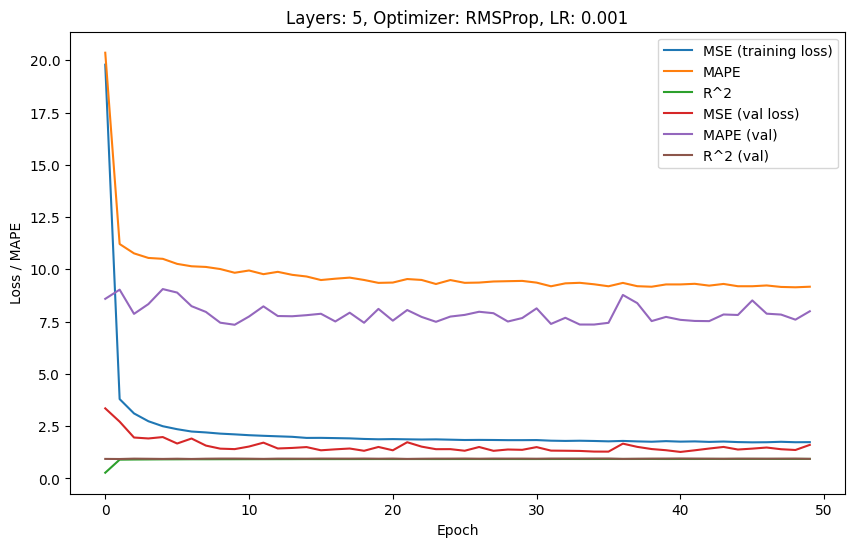

****************************************************************************************************
Layers: 5, Optimizer: Adam, LR: 0.1
Epoch 1/50
1875/1875 [==============================] - 15s 7ms/step - loss: 7.2226 - custom_r2_score: 0.8048 - mape: 15.0837 - mse: 4.6406 - val_loss: 17.8993 - val_custom_r2_score: 0.3513 - val_mape: 34.5659 - val_mse: 15.7830
Epoch 2/50
1875/1875 [==============================] - 12s 6ms/step - loss: 5.2226 - custom_r2_score: 0.8275 - mape: 15.0519 - mse: 4.0979 - val_loss: 16.7736 - val_custom_r2_score: 0.3396 - val_mape: 23.7469 - val_mse: 15.9208
Epoch 3/50
1875/1875 [==============================] - 12s 6ms/step - loss: 4.4968 - custom_r2_score: 0.8505 - mape: 14.2836 - mse: 3.5519 - val_loss: 277.4864 - val_custom_r2_score: -10.6169 - val_mape: 128.5317 - val_mse: 276.7683
Epoch 4/50
1875/1875 [==============================] - 12s 6ms/step - loss: 5.5346 - custom_r2_score: 0.7976 - mape: 15.5605 - mse: 4.8030 - val_loss: 84.4409 - val_custo

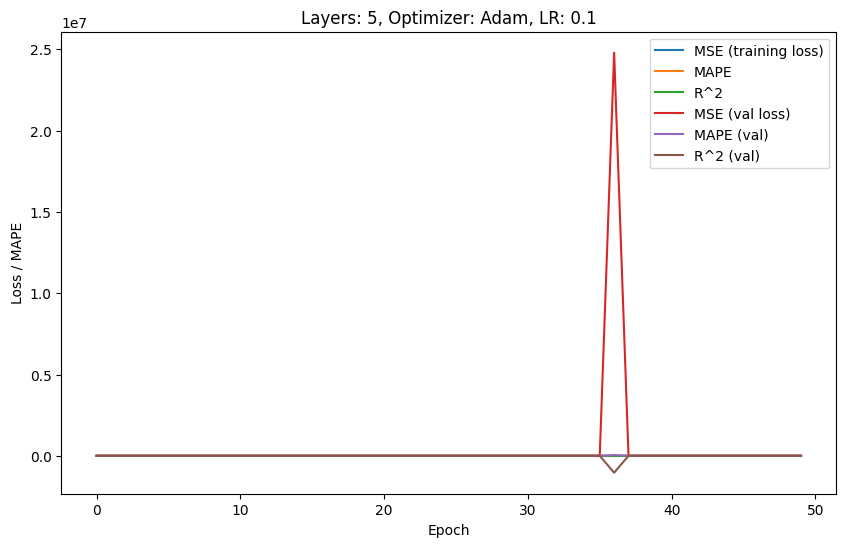

****************************************************************************************************
Layers: 5, Optimizer: Adam, LR: 0.01
Epoch 1/50
1875/1875 [==============================] - 16s 7ms/step - loss: 5.8587 - custom_r2_score: 0.8134 - mape: 13.5832 - mse: 4.4616 - val_loss: 5.8180 - val_custom_r2_score: 0.7745 - val_mape: 14.5300 - val_mse: 5.3948
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 2.8950 - custom_r2_score: 0.8923 - mape: 11.7428 - mse: 2.5547 - val_loss: 2.4743 - val_custom_r2_score: 0.9082 - val_mape: 9.9782 - val_mse: 2.1802
Epoch 3/50
1875/1875 [==============================] - 12s 7ms/step - loss: 2.6865 - custom_r2_score: 0.8982 - mape: 11.4535 - mse: 2.4203 - val_loss: 2.3711 - val_custom_r2_score: 0.9114 - val_mape: 11.6345 - val_mse: 2.1276
Epoch 4/50
1875/1875 [==============================] - 12s 7ms/step - loss: 2.5706 - custom_r2_score: 0.9015 - mape: 11.1830 - mse: 2.3332 - val_loss: 8.0852 - val_custom_r2_score: 

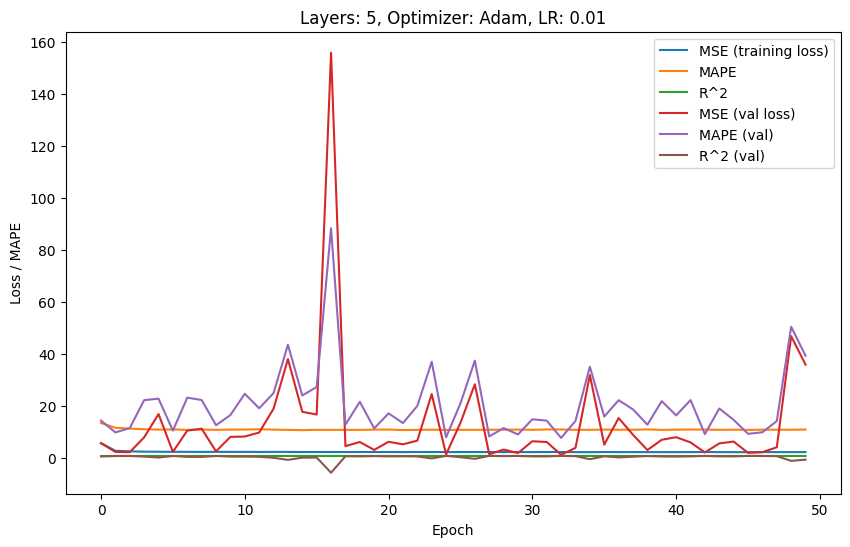

****************************************************************************************************
Layers: 5, Optimizer: Adam, LR: 0.001
Epoch 1/50
1875/1875 [==============================] - 16s 7ms/step - loss: 21.1965 - custom_r2_score: 0.2423 - mape: 21.3264 - mse: 18.1612 - val_loss: 3.8604 - val_custom_r2_score: 0.9229 - val_mape: 9.0587 - val_mse: 1.8532
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 3.8923 - custom_r2_score: 0.9011 - mape: 11.0105 - mse: 2.3524 - val_loss: 2.5762 - val_custom_r2_score: 0.9409 - val_mape: 9.1253 - val_mse: 1.4189
Epoch 3/50
1875/1875 [==============================] - 13s 7ms/step - loss: 3.1525 - custom_r2_score: 0.9070 - mape: 10.7469 - mse: 2.2052 - val_loss: 2.0302 - val_custom_r2_score: 0.9467 - val_mape: 7.9101 - val_mse: 1.2725
Epoch 4/50
1875/1875 [==============================] - 13s 7ms/step - loss: 2.7407 - custom_r2_score: 0.9119 - mape: 10.4343 - mse: 2.0908 - val_loss: 1.9166 - val_custom_r2_score:

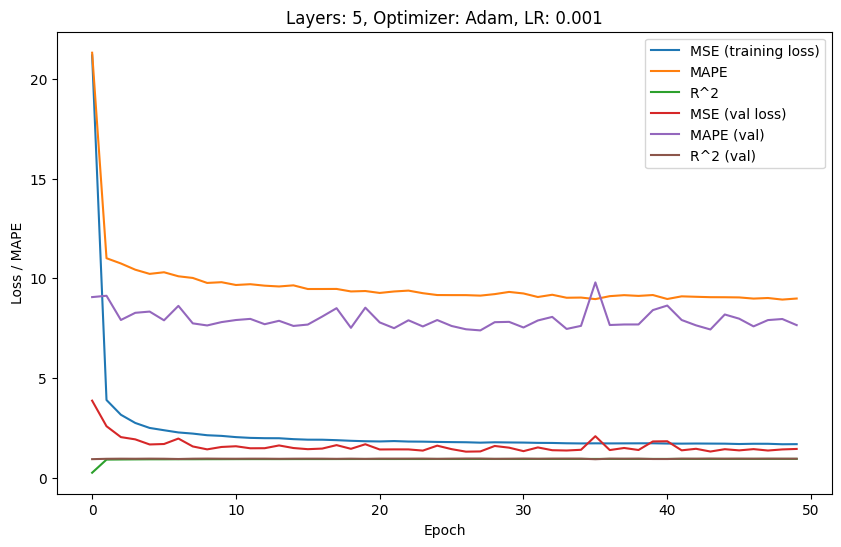

In [34]:
for layers in layers_options:
    for optimizer_name, Optimizer in optimizers_options.items():
        for lr in learning_rates:
          title = f"Layers: {layers}, Optimizer: {optimizer_name}, LR: {lr}"  #, R^2: {r_square:.2f}"
          print('*' * 100)
          print(title)
          model = define_model(layers, Optimizer, lr)
          history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))
          plot_learning_curves(history, title)